In [108]:
#the 3 observations from the data will be written in the read.me

#import modules
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

#declaring data
mousedatapath = "Resources/mousedata.csv"
studydatapath = "Resources/studydata.csv"
mousedata = pd.read_csv(mousedatapath)
studydata = pd.read_csv(studydatapath)

#combining mouse and study data
combinedf = pd.merge(mousedata,studydata,how="inner",on="Mouse ID")
combinedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [109]:
# Checking the number of mice.
totalmice = combinedf["Mouse ID"].count()
totalmice

1893

In [110]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupemice = combinedf[combinedf.duplicated(["Mouse ID","Timepoint"])]
dupemice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [111]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
nodupedf = combinedf.drop_duplicates("Mouse ID")
nodupedf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [112]:
# Checking the number of mice in the clean DataFrame.
totalnodupemice = nodupedf["Mouse ID"].count()
totalnodupemice

249

In [113]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = combinedf.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med = combinedf.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = combinedf.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sd = combinedf.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = combinedf.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sstdf = pd.DataFrame({"Mean":mean,
                    "Median":med,
                    "Variance":var,
                    "Standard Deviation":sd,
                    "SEM":sem})
sstdf

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [114]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
aggdf = combinedf.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
aggdf

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


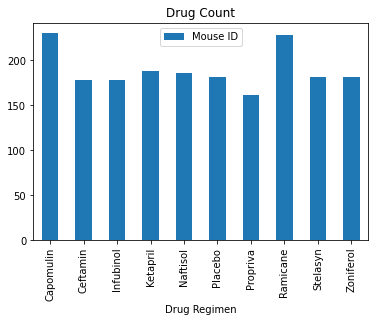

In [115]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
countmicedf = pd.DataFrame(combinedf.groupby(["Drug Regimen"]).count()).reset_index()
countmicecutdf = countmicedf[["Drug Regimen","Mouse ID"]]
countmicecutdf = countmicecutdf.set_index("Drug Regimen")
countmicecutdf.plot(kind="bar",title="Drug Count")

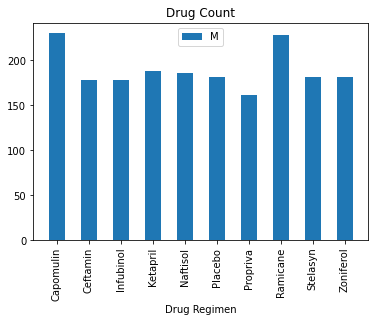

In [116]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(countmicedf["Drug Regimen"],countmicedf["Mouse ID"],0.5)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.legend("Mouse ID",loc="upper center")
plt.title("Drug Count")
plt.show()

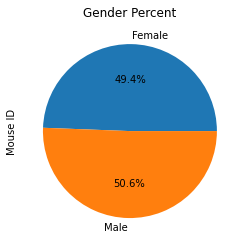

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderdf = pd.DataFrame(combinedf.groupby(["Sex"]).count().reset_index())
gendercutdf = genderdf[["Sex","Mouse ID"]]
gendercutdf.plot(kind="pie",y="Mouse ID",title="Gender Percent",legend=False,labels=genderdf["Sex"],autopct="%1.1f%%")

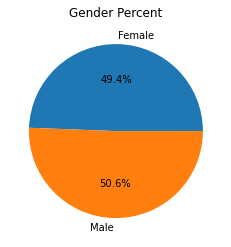

In [118]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gendercutdf["Mouse ID"],labels=gendercutdf["Sex"],autopct="%1.1f%%")
plt.title("Gender Percent")
plt.show()

In [119]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepointdf = combinedf.sort_values(["Drug Regimen","Mouse ID","Timepoint"],ascending=True)
lastdf = timepointdf.loc[timepointdf["Timepoint"]==45]
lastdf.reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1
...,...,...,...,...,...,...,...,...,...
125,1344,p136,Zoniferol,Female,5,28,45,63.488697,2
126,1416,q511,Zoniferol,Female,2,28,45,68.611061,3
127,1434,q633,Zoniferol,Male,12,25,45,70.827796,2
128,1518,s337,Zoniferol,Male,14,27,45,62.109651,4


In [120]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# Determine outliers using upper and lower bounds
capdata = lastdf[lastdf["Drug Regimen"].isin(["Capomulin"])]
ramdata = lastdf[lastdf["Drug Regimen"].isin(["Ramicane"])]
infdata = lastdf[lastdf["Drug Regimen"].isin(["Infubinol"])]
cefdata = lastdf[lastdf["Drug Regimen"].isin(["Ceftamin"])]

In [121]:
#capomulin iqr
capdf = capdata.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
capdf = capdf["Tumor Volume (mm3)"]
capquart = capdf.quantile([.25,.5,.75])
caplower = capquart[0.25]
capupper = capquart[0.75]
capiqr = capupper - caplower
caplowbound = caplower - (1.5*capiqr)
capupbound = capupper + (1.5*capiqr)

print(f"The lower quartile is: {caplower}")
print(f"The upper quartile is: {capupper}")
print(f"The interquartile range is: {capiqr}")
print(f"The median is: {capquart[0.5]}")
print(f"Values below {caplowbound} may be outliers.")
print(f"Values above {capupbound} may be outliers.")

The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The median is: 37.31184577
Values below 20.70456164999999 may be outliers.
Values above 51.83201549 may be outliers.


In [122]:
#infubinol iqr
infdf = infdata.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
infdf = infdf["Tumor Volume (mm3)"]
infquart = infdf.quantile([.25,.5,.75])
inflower = infquart[0.25]
infupper = infquart[0.75]
infiqr = infupper - inflower
inflowbound = inflower - (1.5*infiqr)
infupbound = infupper + (1.5*infiqr)

print(f"The lower quartile is: {inflower}")
print(f"The upper quartile is: {infupper}")
print(f"The interquartile range is: {infiqr}")
print(f"The median is: {infquart[0.5]}")
print(f"Values below {inflowbound} may be outliers.")
print(f"Values above {infupbound} may be outliers.")

The lower quartile is: 62.75445141
The upper quartile is: 67.68556862
The interquartile range is: 4.9311172099999965
The median is: 66.08306589
Values below 55.35777559500001 may be outliers.
Values above 75.08224443499999 may be outliers.


In [123]:
#ramicane iqr
ramdf = ramdata.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ramdf = ramdf["Tumor Volume (mm3)"]
ramquart = ramdf.quantile([.25,.5,.75])
ramlower = ramquart[0.25]
ramupper = ramquart[0.75]
ramiqr = ramupper - ramlower
ramlowbound = ramlower - (1.5*ramiqr)
ramupbound = ramupper + (1.5*ramiqr)

print(f"The lower quartile is: {ramlower}")
print(f"The upper quartile is: {ramupper}")
print(f"The interquartile range is: {ramiqr}")
print(f"The median is: {ramquart[0.5]}")
print(f"Values below {ramlowbound} may be outliers.")
print(f"Values above {ramupbound} may be outliers.")

The lower quartile is: 30.981175224999998
The upper quartile is: 38.508305307499995
The interquartile range is: 7.527130082499998
The median is: 34.848627300000004
Values below 19.690480101250003 may be outliers.
Values above 49.79900043124999 may be outliers.


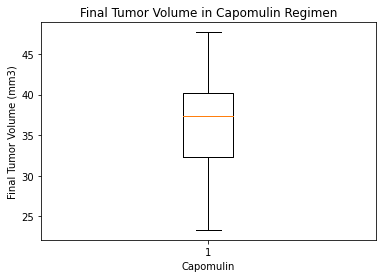

In [124]:
#capomulin box plot
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Capomulin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Capomulin")
ax1.boxplot(capdf)
plt.show()

In [125]:
#ceftamin iqr
cefdf = cefdata.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cefdf = cefdf["Tumor Volume (mm3)"]
cefquart = cefdf.quantile([.25,.5,.75])
ceflower = cefquart[0.25]
cefupper = cefquart[0.75]
cefiqr = cefupper - ceflower
ceflowbound = ceflower - (1.5*cefiqr)
cefupbound = cefupper + (1.5*cefiqr)

print(f"The lower quartile is: {ceflower}")
print(f"The upper quartile is: {cefupper}")
print(f"The interquartile range is: {cefiqr}")
print(f"The median is: {cefquart[0.5]}")
print(f"Values below {ceflowbound} may be outliers.")
print(f"Values above {cefupbound} may be outliers.")

The lower quartile is: 61.43389223
The upper quartile is: 67.52748237
The interquartile range is: 6.093590140000003
The median is: 64.29983003
Values below 52.29350701999999 may be outliers.
Values above 76.66786758 may be outliers.


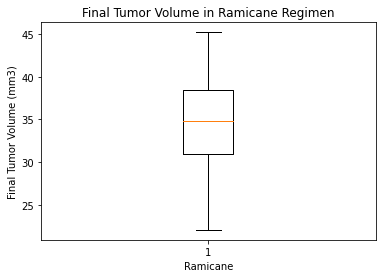

In [126]:
#ramicane box plot
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Ramicane Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Ramicane")
ax1.boxplot(ramdf)
plt.show()

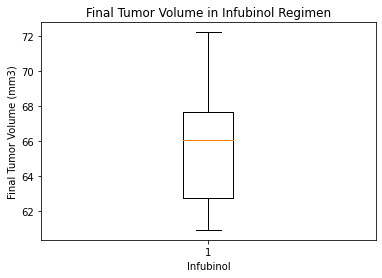

In [127]:
#infubinol box plot
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Infubinol Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Infubinol")
ax1.boxplot(infdf)
plt.show()

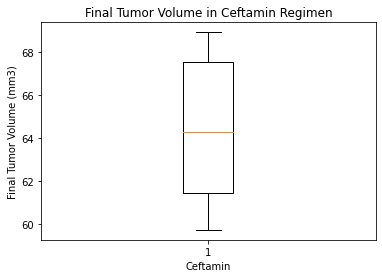

In [128]:
#ceftamin box plot
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume in Ceftamin Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Ceftamin")
ax1.boxplot(cefdf)
plt.show()

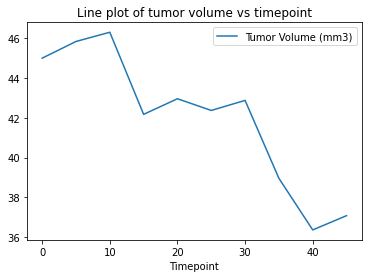

In [129]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capdf = combinedf.loc[combinedf["Drug Regimen"]=="Capomulin"].reset_index()
capmousedf = capdf.loc[capdf["Mouse ID"]=="g288"]
timetumordf = capmousedf.loc[:,["Timepoint","Tumor Volume (mm3)"]].reset_index(drop=True)
timetumordf.set_index("Timepoint").plot(title="Line plot of tumor volume vs timepoint")
plt.show()

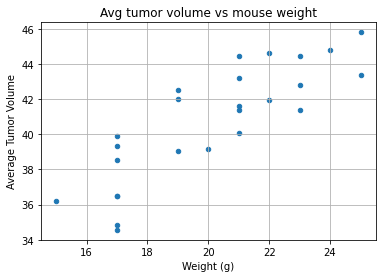

In [130]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weightdf = capdf.loc[:, ["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]
avgcapdf = pd.DataFrame(weightdf.groupby(["Mouse ID","Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avgcapdf = avgcapdf.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume"})
avgcapdf.plot(kind="scatter",x="Weight (g)",y="Average Tumor Volume",grid=True,title="Avg tumor volume vs mouse weight")
plt.show()

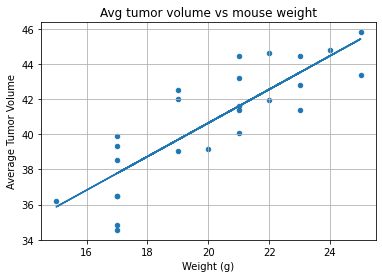

In [131]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = avgcapdf["Weight (g)"]
y = avgcapdf["Average Tumor Volume"]
m, b = np.polyfit(x, y, 1)
avgcapdf.plot(kind="scatter",x="Weight (g)",y="Average Tumor Volume",grid=True,title="Avg tumor volume vs mouse weight")
plt.plot(x, m*x + b)
plt.show()

In [132]:
#statements
r = np.corrcoef(x,y)
r = r[1,0]
print(f"The correlation coefficient is r={r}")
print(f"The linear regression model is: y={m}x+{b}")

The correlation coefficient is r=0.8419363424694717
The linear regression model is: y=0.9544396890241045x+21.55216053268501
